In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
aff_df = pd.read_csv("aff_table.txt", comment="#", sep="\t", header=None)#таблица аффинности гексамеров
sort_aff_df = aff_df.sort_values(0)
sort_aff_df.columns = ['hexamer', 'affinity']
#print(len(df))#есть все гексамеры
sort_aff_df.head(20)
aff_hexa_list = []
for x in sort_aff_df['hexamer']:#какие гексамеры имеют ненулевую аффинность
    aff_hexa_list.append(x)

aff_numb_list = []
for x in sort_aff_df['affinity']:#упорядоченный список аффинности, чтобы потом вставить в df
    aff_numb_list.append(float(x)*(-1))
print(type(aff_numb_list[1]))

hexa_df = pd.read_csv("hexa_all2.txt", comment="#", sep=' ', header=None)#файл со средними покртыиями для всех гексамеров
sort_df = hexa_df.sort_values(0)
sort_df.columns = ['hexamer', 'cover']
hexa_ind_list = []
for x in sort_df['hexamer']:
    hexa_ind_list.append(x in aff_hexa_list)

df = sort_df[hexa_ind_list] #логическая индексация по встречаемости гексамера в таблице аффинности
df['affinity'] = aff_numb_list


<class 'float'>


C:\Users\eguse\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(34.625,0.5,'average rpm per hexamer')

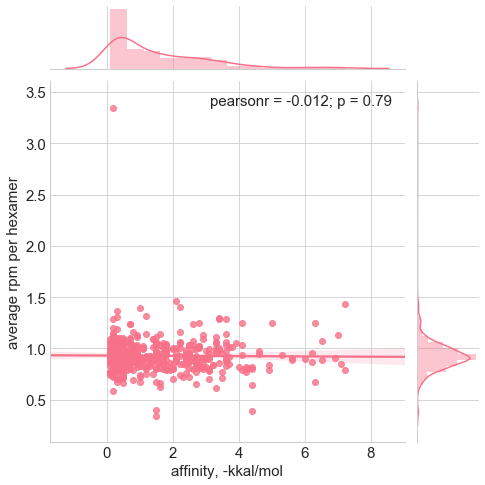

In [13]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("husl")
width, height = 10, 6
mpl.rcParams['figure.figsize'] = [width, height]
mpl.rcParams.update({'font.size': 15})
sns.jointplot("affinity", "cover", size=7, data=df, kind="reg") 
plt.xlabel('affinity, -kkal/mol')
plt.ylabel('average rpm per hexamer')